<a href="https://colab.research.google.com/github/datta-swati/Credit_Card_Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from collections import Counter
import itertools

df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [30]:
fraud = len(df[df.Class == 1])
genuine = len(df[df.Class == 0])
fraud_percent = (fraud / (fraud+genuine) * 100)

print("Number of Fraud transactions : ",fraud)
print("Number of Genuine transactions : ",genuine)
print("Fraud percentage : ",fraud_percent)

Number of Fraud transactions :  38
Number of Genuine transactions :  9926
Fraud percentage :  0.38137294259333604


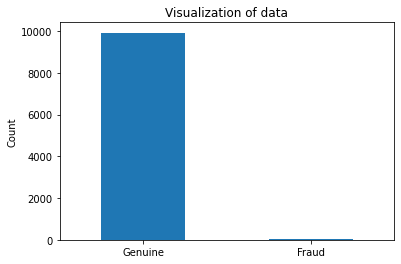

In [33]:
import matplotlib.pyplot as plt
labels=['Genuine','Fraud']
count_classes = df['Class'].value_counts(sort=True)
count_classes.plot(kind="bar", rot=0)
plt.title("Visualization of data")
plt.ylabel("Count")
plt.xticks(range(2),labels)
plt.show()

In [11]:
#train and test the data and resample
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = df.dropna() #remove null values
Y=df["Class"]
X=df.drop("Class", axis = 1)
X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of x : ",X_resampled.shape)
print("Resampled shape of y : ",Y_resampled.shape)
value_counts=Counter(Y_resampled)
print(value_counts)

train_X, test_X, train_Y, test_Y = train_test_split(X_resampled, Y_resampled, test_size = 0.3, random_state = 42)

Resampled shape of x :  (19852, 30)
Resampled shape of y :  (19852,)
Counter({0.0: 9926, 1.0: 9926})


In [12]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [27]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
model = RandomForestClassifier()
model.fit(X_resampled, Y_resampled)
y_predict = model.predict(test_X)
cm_resampled = confusion_matrix(test_Y, y_predict)
print("Confusion Matrix - Random Forest")
print(cm_resampled)

Confusion Matrix - Random Forest
[[3011    0]
 [   0 2945]]


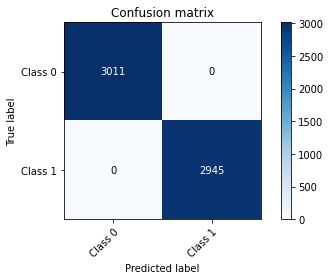

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Generate a confusion matrix
cm = confusion_matrix(test_Y, y_predict)

# Define the class labels
class_labels = ['Class 0', 'Class 1']

# Plot the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

fig.tight_layout()
plt.show()

In [26]:
print("Evaluation of Random Forest Model")
print()
def metrics(test_Y, y_predict):
    print("Accuracy Score : ",accuracy_score(test_Y, y_predict))
    print("Precision Score : ",precision_score(test_Y, y_predict))
    print("Recall Score : ",recall_score(test_Y, y_predict))
    print("F1 Score : ",f1_score(test_Y, y_predict))
metrics(test_Y, predictions_resampled)

Evaluation of Random Forest Model

Accuracy Score :  1.0
Precision Score :  1.0
Recall Score :  1.0
F1 Score :  1.0
